In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

RuntimeError: The current Numpy installation ('c:\\users\\andrea petreti\\documents\\tesi_robotics\\statistics\\robotics-viz\\venv\\lib\\site-packages\\numpy\\__init__.py') fails to pass a sanity check due to a bug in the windows runtime. See this issue for more information: https://tinyurl.com/y3dm3h86

In [2]:
def extract_info(filename):
  pieces = filename.split('_')
  return {
      'nodes': pieces[3][5:],
      'k': pieces[4][1:],
      'population': pieces[5][1:], 
      'generations': pieces[6][1:],
      'mutation': pieces[7][2:],
      'crossover': pieces[8][2:],
      'elitism': pieces[9][2:],
      'bias': pieces[10][4:],
      'proximity': pieces[11][4:],
      'trials': pieces[12][6:]
      }

In [3]:
def extract_title(filename):
  info = extract_info(filename)
  title = "Population: %s, Generations %s, Mutation: %s, Cross: %s, Bias: %s, Proximity: %s, Trial %s" % (info['population'], info['generations'], info['mutation'], info['crossover'], info['bias'], info['proximity'], info['trials'])
  return title

In [4]:
def extract_info_str(filename):
    info = extract_info(filename)
    return "Pop: %s, Mut: %s, Cross: %s, Bias: %s, Prox: %s" % (info['population'], info['mutation'], info['crossover'], info['bias'], info['proximity'])

In [33]:
def plot_performance(basename, generation=-1, outliers=True, figsize=(22,10)):
  data = pd.read_csv(basename + ".csv", ";");
  data.drop(['genome', 'bn'], axis=1)
  fig, ax = plt.subplots(figsize=figsize)
  ax.set_ylim([-0.01, 0.8])
  if generation != -1:
    data = data[data['generation'] <= generation]
  info = extract_info(basename)
  data.boxplot('score', 'generation', ax=ax, showfliers=outliers)
  ax.set_title("Population %s, Mutations: %s, Crossover: %s, Proximity: %s" % (info['population'], info['mutation'], info['crossover'], info['proximity']))
  return data.max()['score']
  

In [49]:
def plot_test2(*filebasename, figsize=(25,10), outliers=True, **kwargs):
  finaldata = pd.DataFrame()
  for basename in filebasename:
    data = pd.read_csv(basename + ".csv", ";")
    info = extract_info(basename)
    data['info'] = np.full((len(data), 1), "Prox: %s\nGen: %s\nBias: %s\nMut: %s\nCross: %s\nPop: %s" % (info['proximity'],info['generations'], info['bias'], info['mutation'], info['crossover'], info['population']))
    finaldata = finaldata.append(data)

  fig, ax = plt.subplots(figsize=figsize)
  ax.set_ylim([-0.01, 0.8])
  bp = finaldata.boxplot('robot_max_count', 'info', ax=ax, showfliers=outliers, notch=True, **kwargs)
  ax.set_title("Performance Test")
  ax.set_xlabel("Configurations")
  ax.set_ylabel("Performance")
  return bp
  

In [7]:
def plot_test_with_extra(files, outliers=True):
  finaldata = pd.DataFrame()
  for file in files:
    basename = file[0]
    extra_data = file[1]
    data = pd.read_csv(basename + ".csv", ";")
    info = extract_info(basename)
    data['info'] = np.full((len(data), 1), "Prox: %s\nGen: %s\nBias: %s\nMut: %s\nCross: %s\nPop: %s\n%s" % (info['proximity'],info['generations'], info['bias'], info['mutation'], info['crossover'], info['population'], extra_data))
    finaldata = finaldata.append(data)

  fig, ax = plt.subplots(figsize=(25,10))
  ax.set_ylim([-0.01, 0.8])
  finaldata.boxplot('robot_max_count', 'info', ax=ax, showfliers=outliers, notch=True)
  return finaldata.max()
  

In [117]:
def plot_test(*filebasename, outliers=True, **kwargs):
  finaldata = pd.DataFrame()
  for basename in filebasename:
    data = pd.read_csv(basename + ".csv", ";")
    info = extract_info(basename)
    data['info'] = np.full((len(data), 1), "Prox: %s\nGen: %s\nBias: %s\nMut: %s\nCross: %s\nPop: %s" % (info['proximity'],info['generations'], info['bias'], info['mutation'], info['crossover'], info['population']))
    finaldata = finaldata.append(data)

  fig, ax = plt.subplots(figsize=(25,10))
  ax.set_ylim([-0.01, 0.8])
  bp = finaldata.boxplot('performance', 'info', ax=ax, showfliers=outliers, notch=True, **kwargs)
  ax.set_title("Performance Test")
  ax.set_xlabel("Configurations")
  ax.set_ylabel("Performance")
  return bp
  

In [74]:
def compare(evolve_basename, outliers=False, notch=True, figsize=(25,10), **kwargs):
  data = pd.read_csv(evolve_basename + ".csv", ";")
  genetic_score = data.drop(['runIndex', 'runScore'], axis=1)

  fig, ax = plt.subplots(figsize=figsize)
  ax.set_ylim([-0.01, 0.8])
  data.boxplot('runScore', 'genomeIndex', ax=ax, showfliers=outliers, notch=notch)
  ax.set_title("")
  genetic_score = genetic_score.drop_duplicates()

  title = extract_title(evolve_basename)
  ax.scatter(np.asarray(genetic_score['genomeIndex'] + 1),
            np.asarray(genetic_score['geneticScore']),
            c = 'r',
            **kwargs)
  ax.set_title("Performance comparison in \"train\" and test")
  ax.set_xlabel("Genome")
  ax.set_ylabel("Performance")

In [3]:
def avg_fitness(filename, figsize=(20,10), ax=None):
  data = pd.read_csv(filename, ";");
  data = data.drop(['genome','score'], axis=1)
  avg = data.groupby(['generation']).mean()
  if (ax == None):
    fig, ax = plt.subplots(figsize=figsize)
  avg.plot(ax=ax)
  ax.set_title("Avg Fitness\n ")# + extract_title(filename))
  ax.grid()
  ax.set_xticks(np.arange(0, 101, step=1))
  return ax


In [11]:
def avg_robot_count(evolve_basename,figsize=(20,10), ax=None):
  data = pd.read_csv(evolve_basename + ".csv", ";");
  data = data.drop(['bn', 'genome', 'score'], axis=1)
  avg = data.groupby(['generation']).mean()
  if (ax == None):
    fig, ax = plt.subplots(figsize=figsize)
  avg.plot(ax=ax)
  ax.set_title("Avg Fitness\n " + extract_title(evolve_basename))
  ax.grid()
  ax.set_xticks(np.arange(0, 81, step=1))
  return ax

In [61]:
def compare_avg_robot_count(*evolves, figsize=(20,10), **kwargs):
    fig, ax = plt.subplots(figsize=figsize)
    legend_labels = []
    for basename in evolves:
        data = pd.read_csv(basename + ".csv", ";")
        data = data.drop(['bn', 'genome', 'score'], axis=1)
        avg = data.groupby(['generation']).mean()
        avg.plot(ax=ax, **kwargs)
        legend_labels.append(extract_info_str(basename))
    ax.set_title("Compare Avg Fitness\n ")
    ax.grid()
    #ax.set_xticks(np.arange(0, 81, step=1))
    ax.legend(labels=legend_labels)
    ax.set_xlabel("Generation")
    ax.set_ylabel("Performance")
        

In [122]:
def compare_avg_fitness(*evolves, figsize=(20,10), **kwargs):
    fig, ax = plt.subplots(figsize=figsize)
    legend_labels = []
    for basename in evolves:
        data = pd.read_csv(basename + ".csv", ";")
        drop_column = ['bn', 'genome', 'extra'] if 'extra' in data.columns else ['bn', 'genome']
        data = data.drop(drop_column, axis=1)
        
        avg = data.groupby(['generation']).mean()
        avg.plot(ax=ax, **kwargs)
        legend_labels.append(extract_info_str(basename))
    ax.set_title("Compare Avg Fitness\n ")
    ax.grid()
    #ax.set_xticks(np.arange(0, 81, step=1))
    ax.legend(labels=legend_labels)
    ax.set_xlabel("Generation")
    ax.set_ylabel("Performance")
    return data
        

In [30]:
def get_box_plot_data(labels, bp):
    rows_list = []

    for i in range(len(bp['boxes'])):
        dict1 = {}
        dict1['lower_whisker'] = bp['whiskers'][i*2].get_ydata()[1]
        dict1['lower_quartile'] = bp['boxes'][i].get_ydata()[1]
        dict1['median'] = bp['medians'][i].get_ydata()[1]
        dict1['upper_quartile'] = bp['boxes'][i].get_ydata()[2]
        dict1['upper_whisker'] = bp['whiskers'][(i*2)+1].get_ydata()[1]
        rows_list.append(dict1)

    return pd.DataFrame(rows_list)

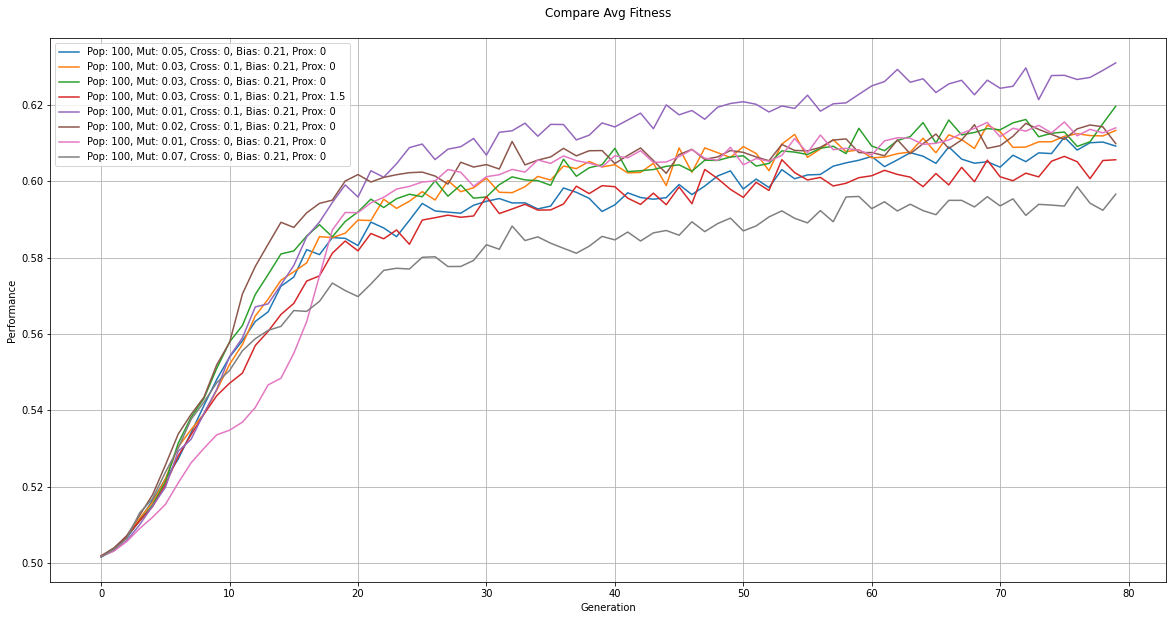

In [14]:
compare_avg_fitness("performance/archivied/evolve_12-03_19-06_nodes50_k3_p100_g80_pM0.05_pC0_el5_bias0.21_prox0_trials3",
           "performance/archivied/evolve_12-02_21-56_nodes50_k3_p100_g80_pM0.03_pC0.1_el5_bias0.21_prox0_trials3",
           "performance/archivied/evolve_12-03_07-48_nodes50_k3_p100_g80_pM0.03_pC0_el5_bias0.21_prox0_trials3",
           "performance/archivied/evolve_12-03_21-18_nodes50_k3_p100_g80_pM0.03_pC0.1_el5_bias0.21_prox1.5_trials3",
          "performance/archivied/evolve_12-04_04-16_nodes50_k3_p100_g80_pM0.01_pC0.1_el5_bias0.21_prox0_trials3",
          "performance/archivied/evolve_12-03_23-30_nodes50_k3_p100_g80_pM0.02_pC0.1_el5_bias0.21_prox0_trials3",
                   "performance/archivied/evolve_12-04_18-37_nodes50_k3_p100_g80_pM0.01_pC0_el5_bias0.21_prox0_trials3",
                   "performance/archivied/evolve_12-05_17-57_nodes50_k3_p100_g80_pM0.07_pC0_el5_bias0.21_prox0_trials3",
                   )

FileNotFoundError: [Errno 2] No such file or directory: 'performance/archivied/evolve_12-09_14-32_nodes50_k3_p100_g80_pM0.01_pC0.02_el5_bias0.21_prox0_trials3.csv'

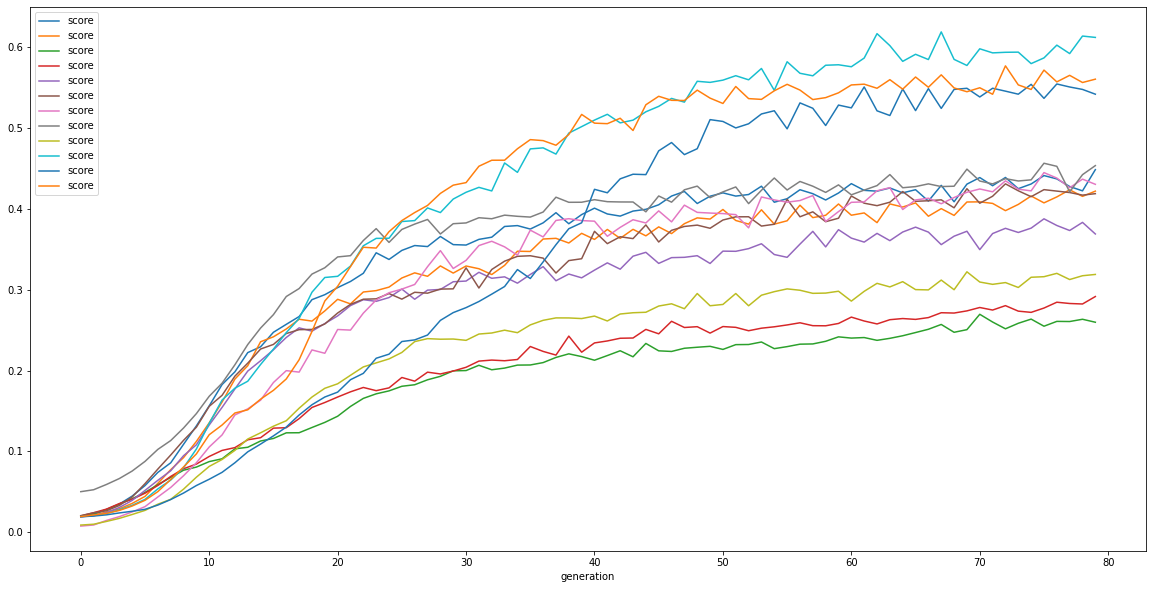

In [14]:
compare_avg_fitness("performance/archivied/evolve_12-07_12-15_nodes50_k3_p100_g80_pM0.03_pC0.1_el5_bias0.21_prox0_trials3",
                   "performance/archivied/evolve_12-07_14-35_nodes50_k3_p100_g80_pM0.03_pC0_el5_bias0.21_prox0_trials3",
                   "performance/archivied/evolve_12-07_16-32_nodes50_k3_p100_g80_pM0.15_pC0_el5_bias0.21_prox0_trials3",
                   "performance/archivied/evolve_12-07_18-26_nodes50_k3_p100_g80_pM0.15_pC0.1_el5_bias0.21_prox0_trials3",
                   "performance/archivied/evolve_12-07_20-52_nodes50_k3_p100_g80_pM0.05_pC0_el5_bias0.21_prox0_trials3",
                   "performance/archivied/evolve_12-07_22-55_nodes50_k3_p100_g80_pM0.05_pC0.1_el5_bias0.21_prox0_trials3",
                   "performance/archivied/evolve_12-08_09-33_nodes50_k3_p100_g80_pM0.03_pC0.1_el5_bias0.21_prox0_trials3",
                   "performance/archivied/evolve_12-08_11-34_nodes50_k3_p100_g80_pM0.03_pC0.1_el5_bias0.21_prox0_trials3",
                   "performance/archivied/evolve_12-08_14-23_nodes50_k3_p100_g80_pM0.03_pC0.1_el5_bias0.21_prox0_trials3",
                   "performance/archivied/evolve_12-08_22-08_nodes50_k3_p100_g80_pM0.01_pC0.1_el5_bias0.21_prox0_trials3",
                   "performance/archivied/evolve_12-09_00-40_nodes50_k3_p100_g80_pM0.01_pC0_el5_bias0.21_prox0_trials3",
                   "performance/archivied/evolve_12-09_09-23_nodes50_k3_p100_g80_pM0.01_pC0.05_el5_bias0.21_prox0_trials3",
                   "performance/evolve_12-09_14-32_nodes50_k3_p100_g80_pM0.01_pC0.02_el5_bias0.21_prox0_trials3",
                   "performance/evolve_12-09_16-10_nodes50_k3_p100_g80_pM0.01_pC0.01_el5_bias0.21_prox0_trials3")

trial                                                             29
performance                                                 0.866072
robot_max_count                                             0.733333
info               Prox: 0\nGen: 80\nBias: 0.21\nMut: 0.15\nCross...
dtype: object

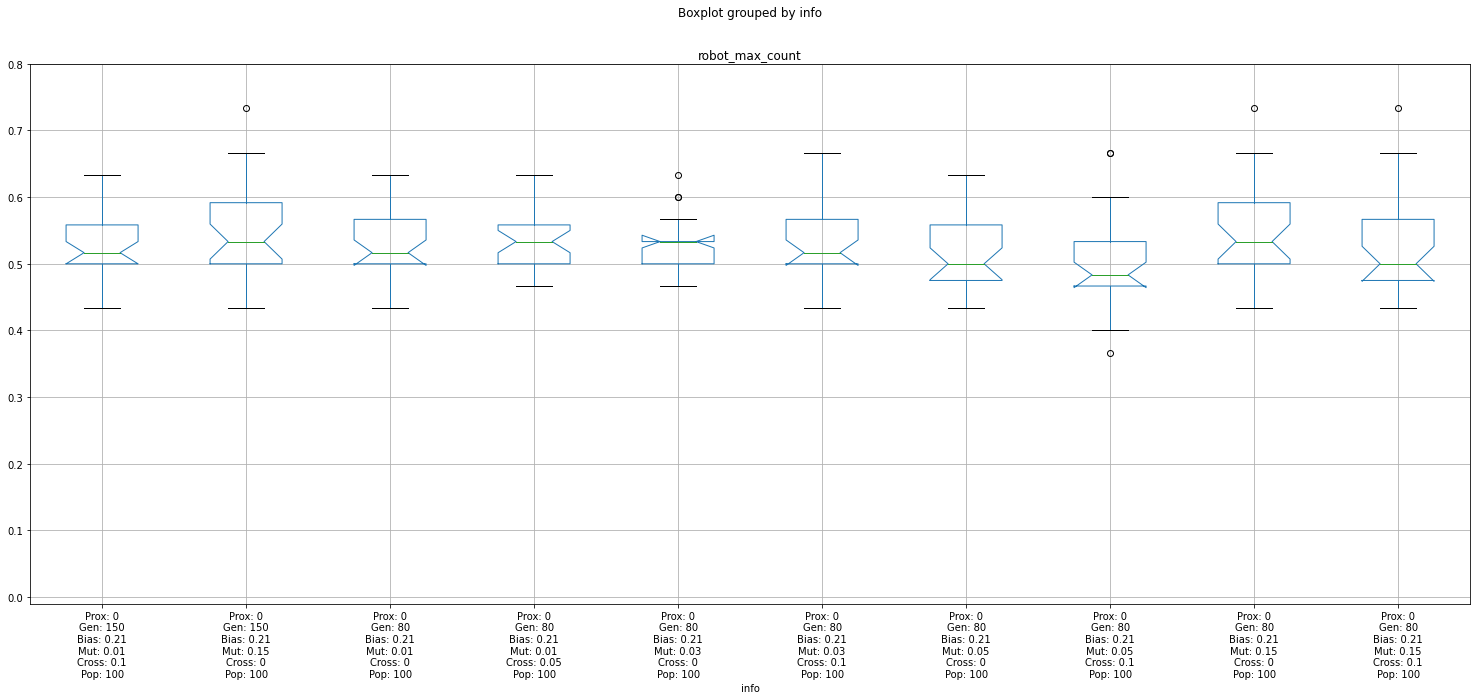

In [176]:
plot_test2("performance/archivied/test_12-07_12-15_nodes50_k3_p100_g80_pM0.03_pC0.1_el5_bias0.21_prox0_trials3",
          "performance/archivied/test_12-07_14-35_nodes50_k3_p100_g80_pM0.03_pC0_el5_bias0.21_prox0_trials3",
          "performance/archivied/test_12-07_16-32_nodes50_k3_p100_g80_pM0.15_pC0_el5_bias0.21_prox0_trials3",
          "performance/archivied/test_12-07_18-26_nodes50_k3_p100_g80_pM0.15_pC0.1_el5_bias0.21_prox0_trials3",
          "performance/archivied/test_12-07_20-52_nodes50_k3_p100_g80_pM0.05_pC0_el5_bias0.21_prox0_trials3",
          "performance/archivied/test_12-07_22-55_nodes50_k3_p100_g80_pM0.05_pC0.1_el5_bias0.21_prox0_trials3",
          "performance/archivied/test_12-08_16-15_nodes50_k3_p100_g150_pM0.15_pC0_el5_bias0.21_prox0_trials3",
          "performance/archivied/test_12-09_00-40_nodes50_k3_p100_g80_pM0.01_pC0_el5_bias0.21_prox0_trials3",
          "performance/archivied/test_12-09_09-23_nodes50_k3_p100_g80_pM0.01_pC0.05_el5_bias0.21_prox0_trials3",
          "performance/archivied/test_12-09_18-18_nodes50_k3_p100_g150_pM0.01_pC0.1_el5_bias0.21_prox0_trials3")

trial                                                             29
performance                                                 0.653245
robot_max_count                                             0.633333
info               Prox: 1.5\nGen: 80\nBias: 0.21\nMut: 0.03\nCro...
dtype: object

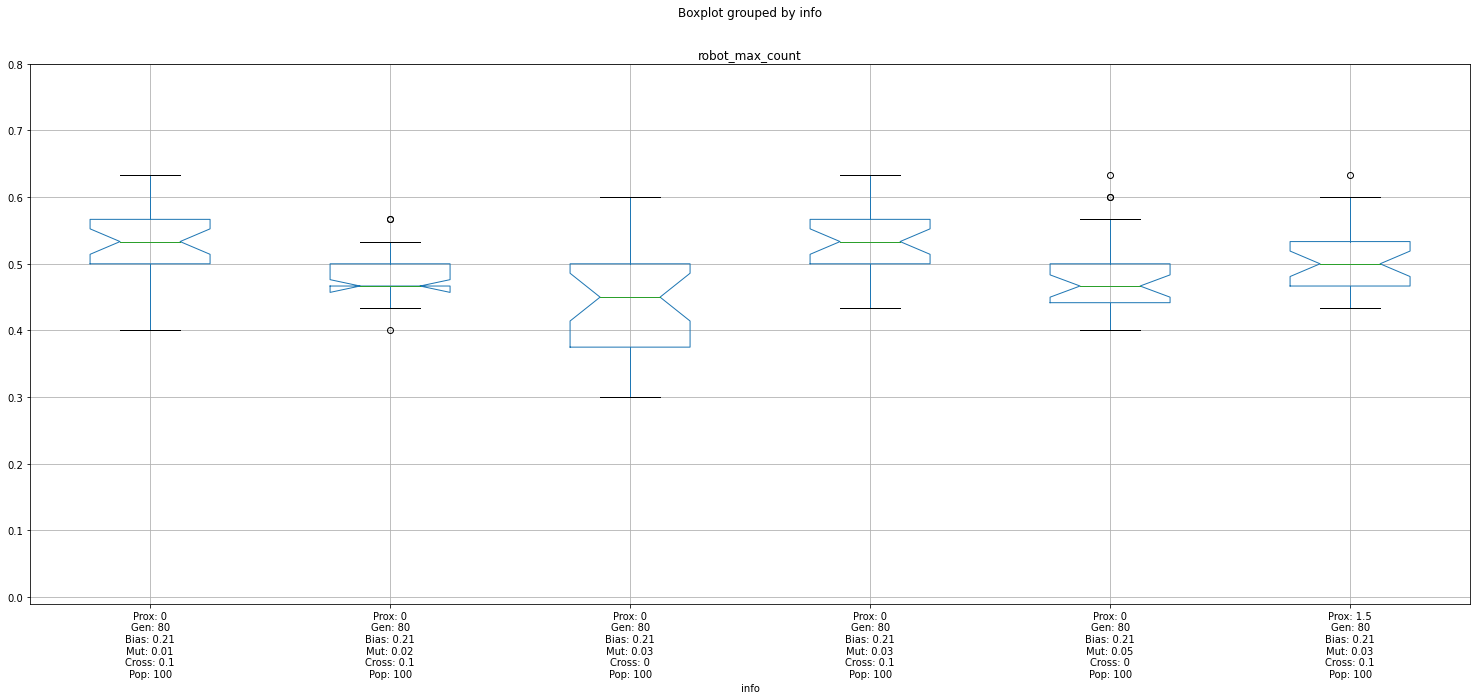

In [163]:
plot_test2("performance/archivied/test_12-03_19-06_nodes50_k3_p100_g80_pM0.05_pC0_el5_bias0.21_prox0_trials3",
           "performance/archivied/test_12-02_21-56_nodes50_k3_p100_g80_pM0.03_pC0.1_el5_bias0.21_prox0_trials3",
           "performance/archivied/test_12-03_07-48_nodes50_k3_p100_g80_pM0.03_pC0_el5_bias0.21_prox0_trials3",
           "performance/archivied/test_12-03_21-18_nodes50_k3_p100_g80_pM0.03_pC0.1_el5_bias0.21_prox1.5_trials3",
          "performance/archivied/test_12-04_04-16_nodes50_k3_p100_g80_pM0.01_pC0.1_el5_bias0.21_prox0_trials3",
          "performance/archivied/test_12-03_23-30_nodes50_k3_p100_g80_pM0.02_pC0.1_el5_bias0.21_prox0_trials3")
            #"performance/archivied/test_12-04_12-36_nodes50_k3_p100_g80_pM0.03_pC0.1_el5_bias0.21_prox0_trials3") ## with tanh

trial                                                             29
performance                                                 0.660756
robot_max_count                                             0.666667
info               Prox: 0\nGen: 80\nBias: 0.21\nMut: 0.07\nCross...
dtype: object

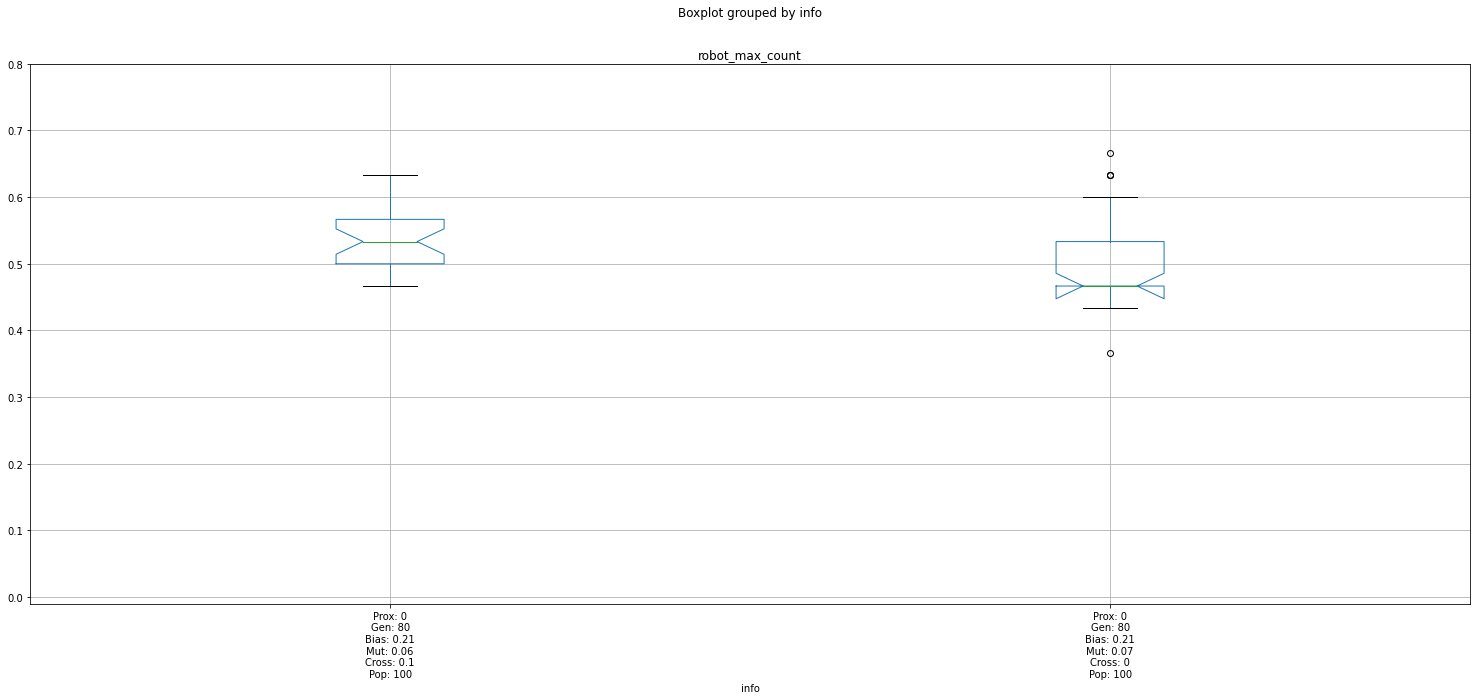

In [20]:
plot_test2(
          "performance/test_12-05_17-57_nodes50_k3_p100_g80_pM0.07_pC0_el5_bias0.21_prox0_trials3",
            #"performance/test_12-05_20-44_nodes50_k3_p100_g80_pM0.06_pC0.1_el5_bias0.21_prox0_trials3",
"performance/test_12-06_11-44_nodes50_k3_p100_g80_pM0.06_pC0.1_el5_bias0.21_prox0_trials3")

## Email 9/12/2020

trial                                                             29
performance                                                 0.791391
robot_max_count                                             0.666667
info               Prox: 0\nGen: 80\nBias: 0.21\nMut: 0.03\nCross...
dtype: object

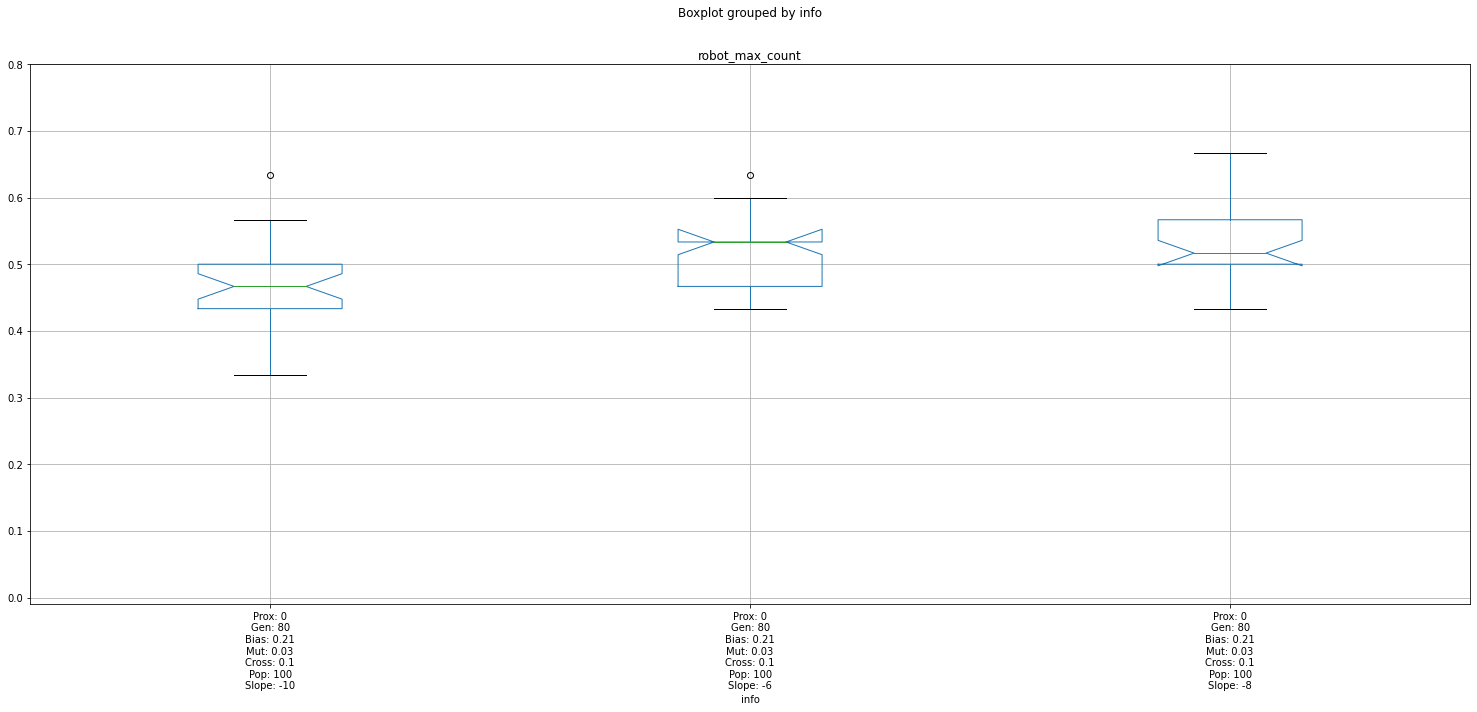

In [126]:
## comparazione per stabilire slope della sigmoide parametrica
plot_test_with_extra([
    ("performance/archivied/test_12-07_12-15_nodes50_k3_p100_g80_pM0.03_pC0.1_el5_bias0.21_prox0_trials3", "Slope: -8"),
    ("performance/archivied/test_12-08_09-33_nodes50_k3_p100_g80_pM0.03_pC0.1_el5_bias0.21_prox0_trials3", "Slope: -10"),
    ("performance/archivied/test_12-08_11-34_nodes50_k3_p100_g80_pM0.03_pC0.1_el5_bias0.21_prox0_trials3", "Slope: -6")
])

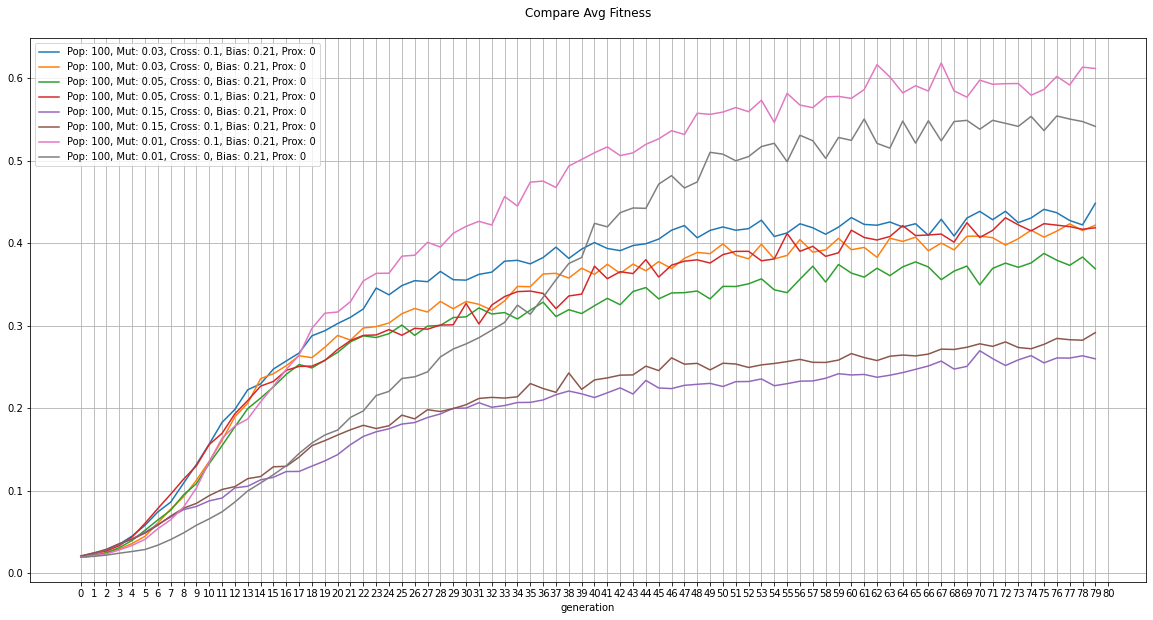

In [15]:
## fitness media delle varie configurazioni
compare_avg_fitness("performance/archivied/evolve_12-07_12-15_nodes50_k3_p100_g80_pM0.03_pC0.1_el5_bias0.21_prox0_trials3",
                    "performance/archivied/evolve_12-07_14-35_nodes50_k3_p100_g80_pM0.03_pC0_el5_bias0.21_prox0_trials3",
                    "performance/archivied/evolve_12-07_20-52_nodes50_k3_p100_g80_pM0.05_pC0_el5_bias0.21_prox0_trials3",
                    "performance/archivied/evolve_12-07_22-55_nodes50_k3_p100_g80_pM0.05_pC0.1_el5_bias0.21_prox0_trials3",
                    "performance/archivied/evolve_12-07_16-32_nodes50_k3_p100_g80_pM0.15_pC0_el5_bias0.21_prox0_trials3",
                    "performance/archivied/evolve_12-07_18-26_nodes50_k3_p100_g80_pM0.15_pC0.1_el5_bias0.21_prox0_trials3",
                    "performance/archivied/evolve_12-08_22-08_nodes50_k3_p100_g80_pM0.01_pC0.1_el5_bias0.21_prox0_trials3",
                    "performance/archivied/evolve_12-09_00-40_nodes50_k3_p100_g80_pM0.01_pC0_el5_bias0.21_prox0_trials3")

trial                                                             29
performance                                                 0.866072
robot_max_count                                             0.733333
info               Prox: 0\nGen: 80\nBias: 0.21\nMut: 0.15\nCross...
dtype: object

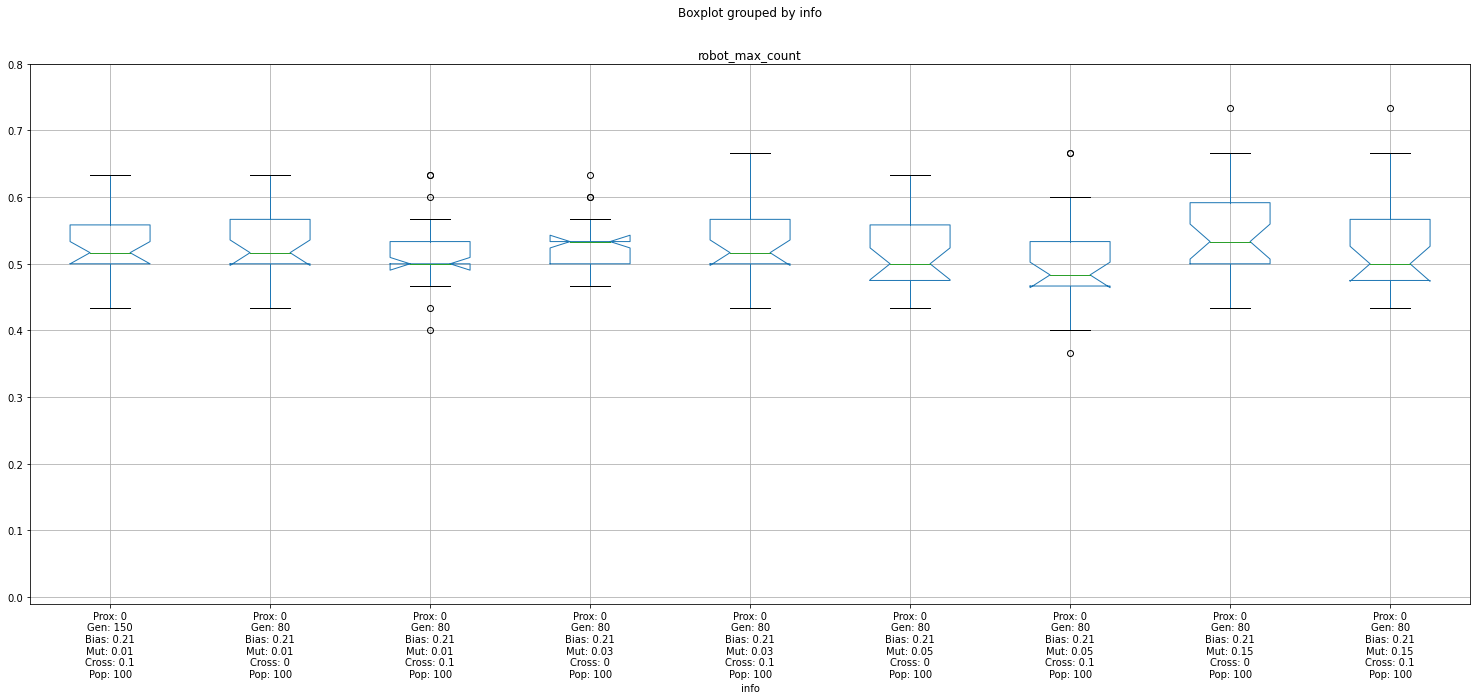

In [16]:
# risultati nel test delle varie configurazioni
plot_test2("performance/archivied/test_12-07_12-15_nodes50_k3_p100_g80_pM0.03_pC0.1_el5_bias0.21_prox0_trials3",
            "performance/archivied/test_12-07_14-35_nodes50_k3_p100_g80_pM0.03_pC0_el5_bias0.21_prox0_trials3",
            "performance/archivied/test_12-07_20-52_nodes50_k3_p100_g80_pM0.05_pC0_el5_bias0.21_prox0_trials3",
            "performance/archivied/test_12-07_22-55_nodes50_k3_p100_g80_pM0.05_pC0.1_el5_bias0.21_prox0_trials3",
            "performance/archivied/test_12-07_16-32_nodes50_k3_p100_g80_pM0.15_pC0_el5_bias0.21_prox0_trials3",
            "performance/archivied/test_12-07_18-26_nodes50_k3_p100_g80_pM0.15_pC0.1_el5_bias0.21_prox0_trials3",
            "performance/archivied/test_12-08_22-08_nodes50_k3_p100_g80_pM0.01_pC0.1_el5_bias0.21_prox0_trials3",
            "performance/archivied/test_12-09_00-40_nodes50_k3_p100_g80_pM0.01_pC0_el5_bias0.21_prox0_trials3",
            "performance/archivied/test_12-09_18-18_nodes50_k3_p100_g150_pM0.01_pC0.1_el5_bias0.21_prox0_trials3")

## My Fitness


<AxesSubplot:title={'center':'Avg Fitness\n Population: 100, Generations 80, Mutation: 0.01, Cross: 0.1, Bias: 0.21, Proximity: 0, Trial 3'}, xlabel='generation'>

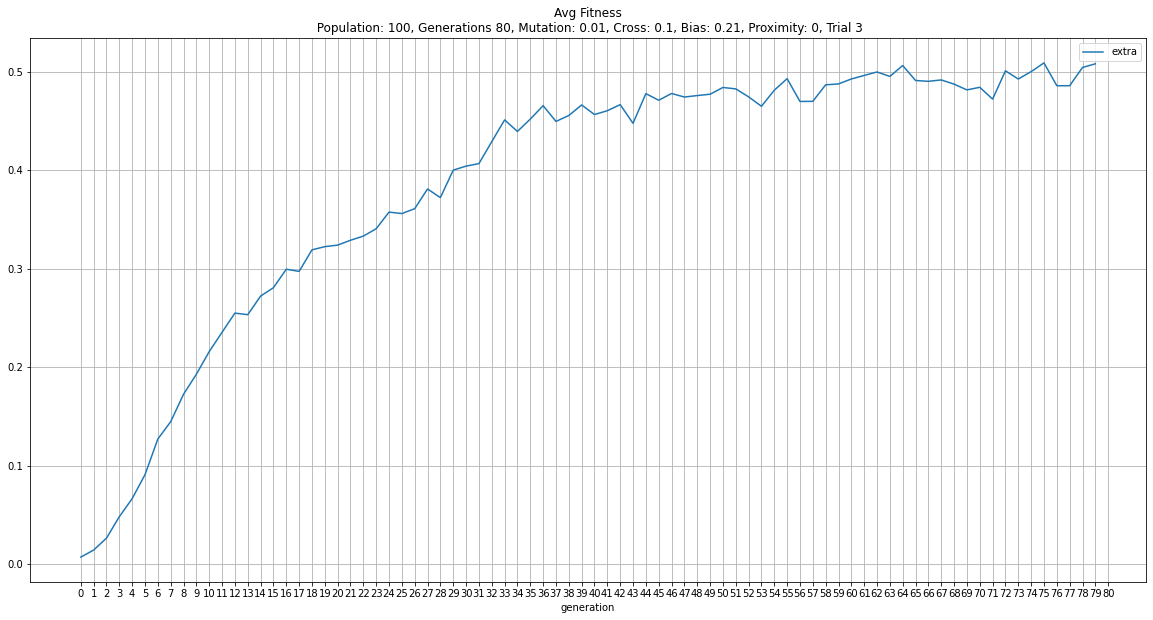

In [46]:
avg_robot_count("performance/evolve_12-16_11-29_nodes50_k3_p100_g80_pM0.01_pC0.1_el5_bias0.21_prox0_trials3")

<AxesSubplot:title={'center':'Avg Fitness\n Population: 100, Generations 150, Mutation: 0.03, Cross: 0, Bias: 0.21, Proximity: 0, Trial 3'}, xlabel='generation'>

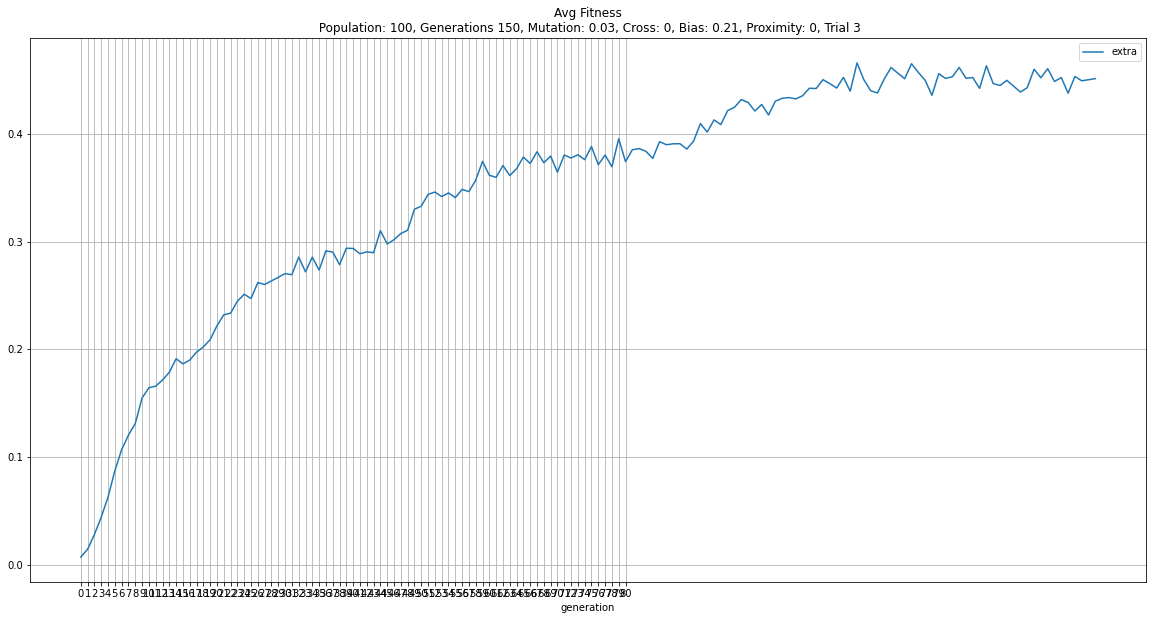

In [33]:
avg_robot_count("performance/evolve_12-16_16-09_nodes50_k3_p100_g150_pM0.03_pC0_el5_bias0.21_prox0_trials3")

<AxesSubplot:title={'center':'Avg Fitness\n Population: 100, Generations 150, Mutation: 0.03, Cross: 0.1, Bias: 0.21, Proximity: 0, Trial 3'}, xlabel='generation'>

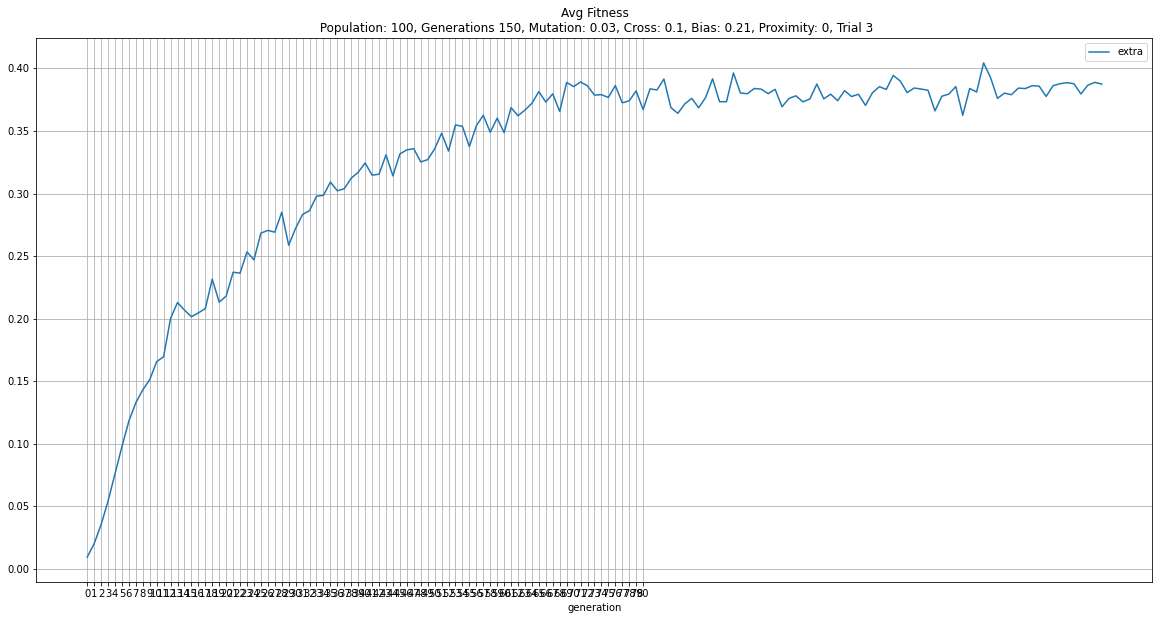

In [41]:
avg_robot_count("performance/evolve_12-16_20-02_nodes50_k3_p100_g150_pM0.03_pC0.1_el5_bias0.21_prox0_trials3")

trial                                                             29
performance                                                 0.633333
robot_max_count                                             0.633333
info               Prox: 0\nGen: 80\nBias: 0.21\nMut: 0.03\nCross...
dtype: object

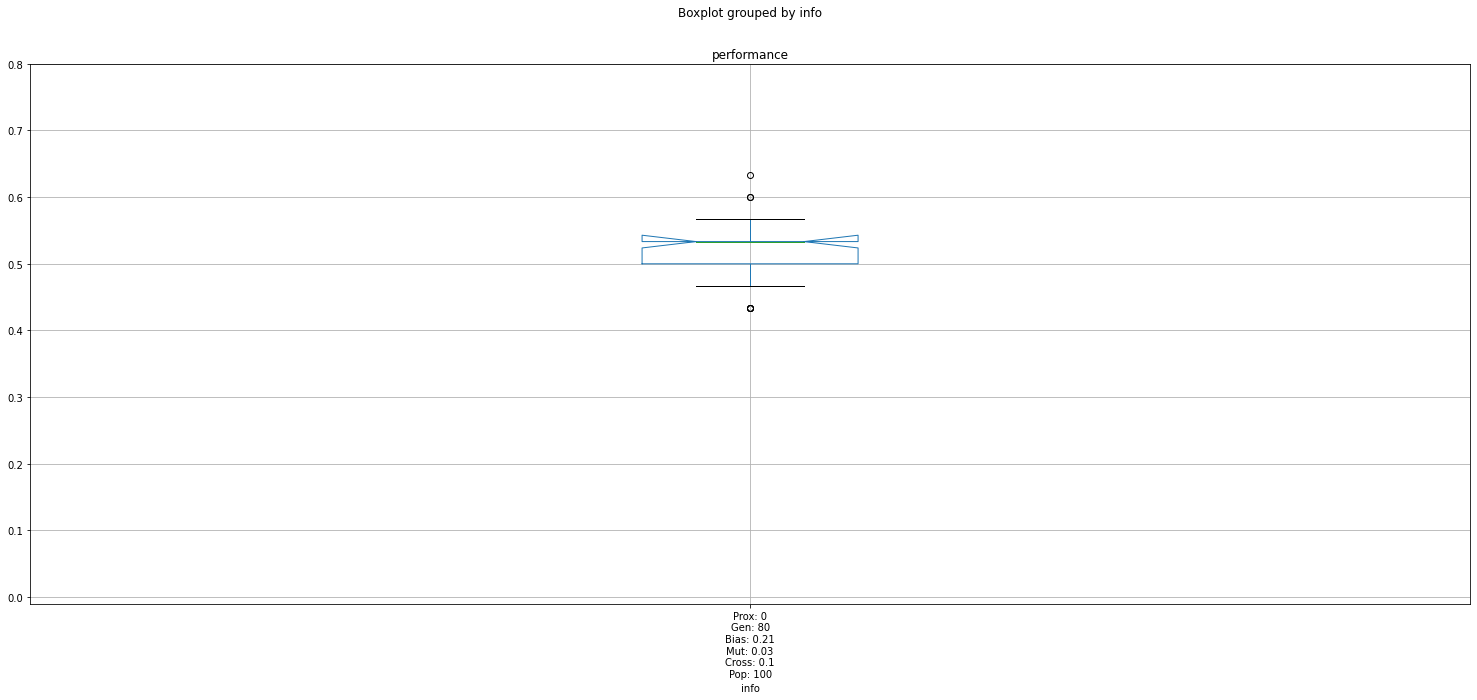

In [13]:
plot_test("performance/archivied/test_12-17_13-01_nodes50_k3_p100_g80_pM0.03_pC0.1_el5_bias0.21_prox0_trials3")

# Experiment 1

<AxesSubplot:title={'center':'Performance Test'}, xlabel='Configurations', ylabel='Performance'>

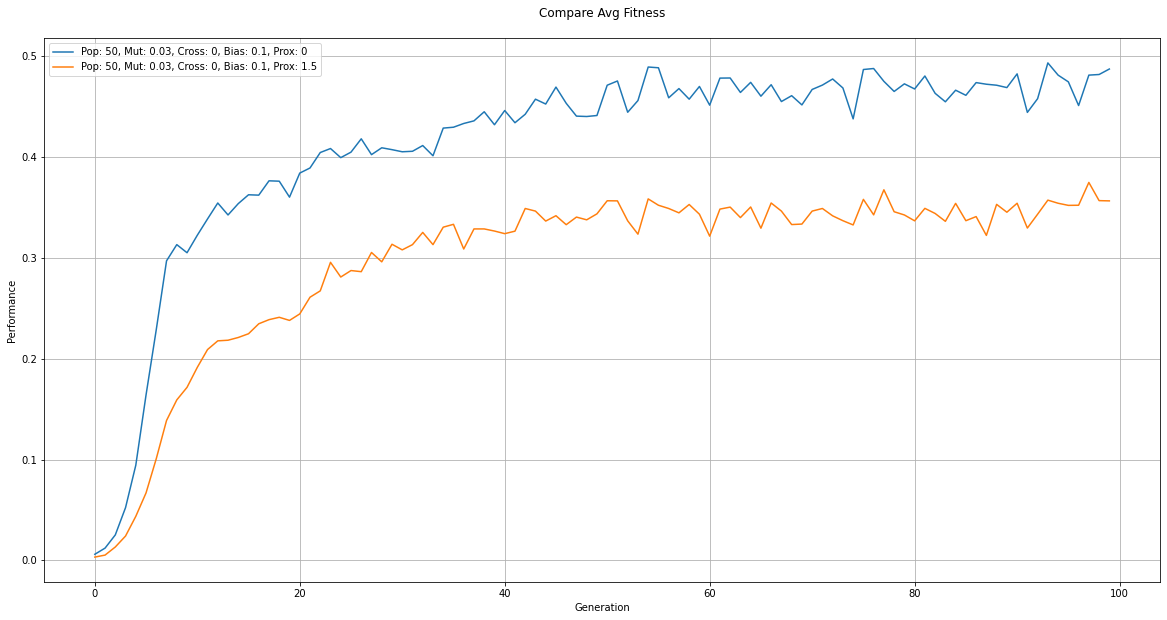

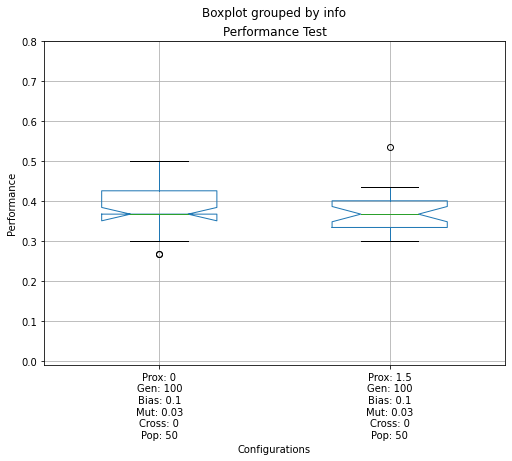

In [60]:
# valutazione della prossimità con mutazione e crossover fissi
compare_avg_robot_count("performance/archivied/evolve_12-17_16-55_nodes20_k3_p50_g100_pM0.03_pC0_el5_bias0.1_prox0_trials3",
                        "performance/archivied/evolve_12-17_18-59_nodes20_k3_p50_g100_pM0.03_pC0_el5_bias0.1_prox1.5_trials3")
                        #"performance/archivied/evolve_12-17_21-12_nodes20_k3_p50_g100_pM0.03_pC0_el5_bias0.1_prox3_trials3")
plot_test2("performance/archivied/test_12-17_16-55_nodes20_k3_p50_g100_pM0.03_pC0_el5_bias0.1_prox0_trials3",
           "performance/archivied/test_12-17_18-59_nodes20_k3_p50_g100_pM0.03_pC0_el5_bias0.1_prox1.5_trials3",
           figsize=(8, 6), fontsize=10, widths=0.5)
           #"performance/archivied/test_12-17_21-12_nodes20_k3_p50_g100_pM0.03_pC0_el5_bias0.1_prox3_trials3")
    

<AxesSubplot:title={'center':'Performance Test'}, xlabel='Configurations', ylabel='Performance'>

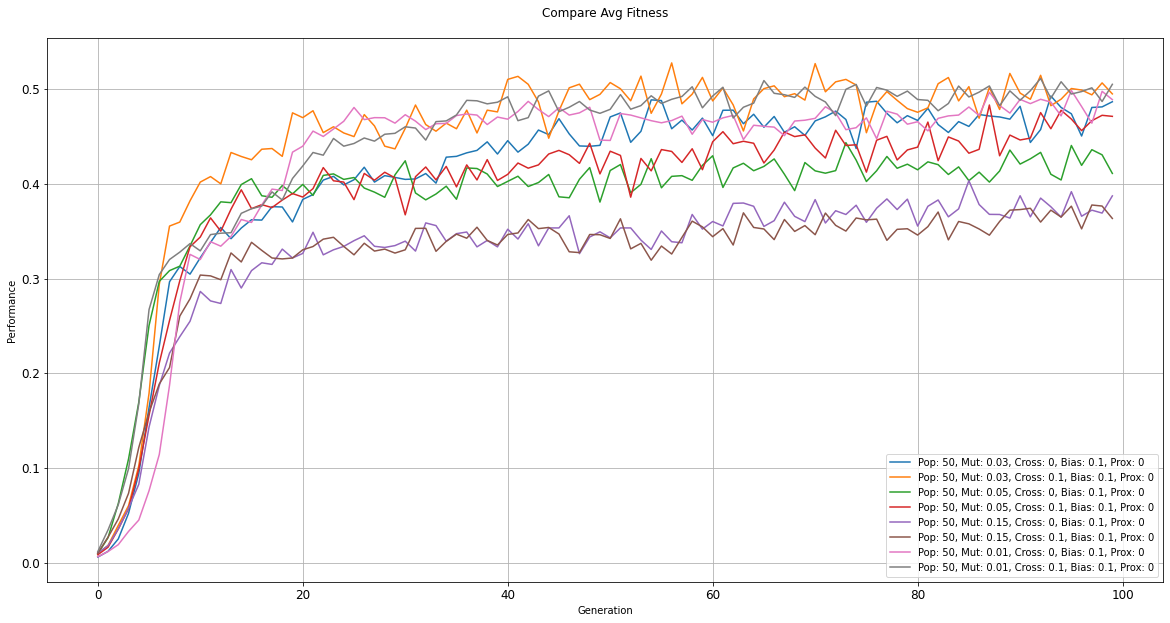

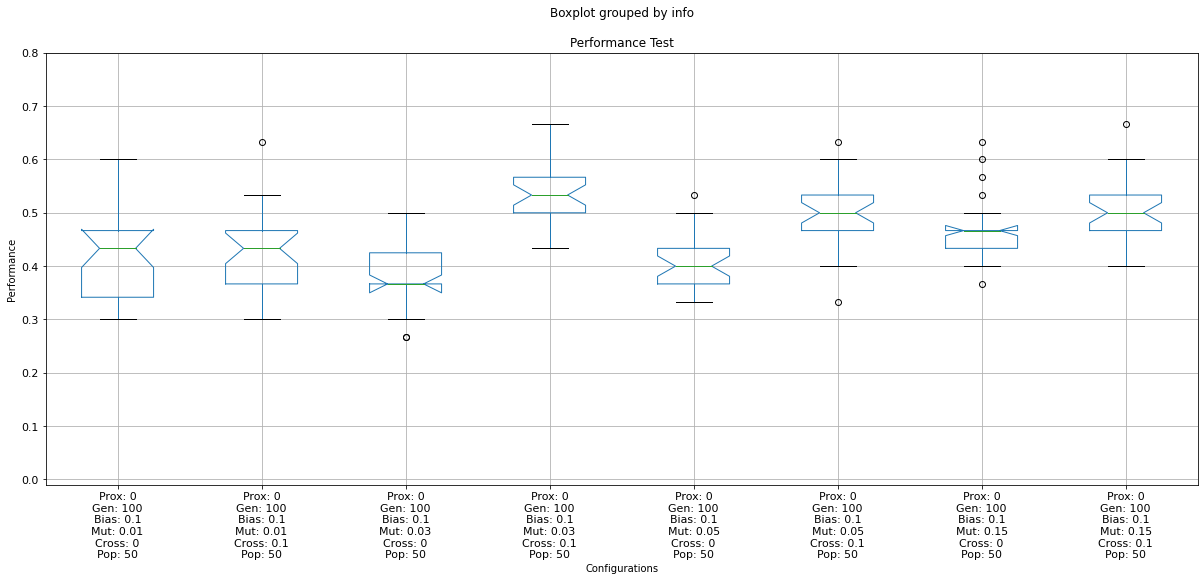

In [105]:
# esperimenti: fitness media
compare_avg_robot_count("performance/archivied/evolve_12-17_16-55_nodes20_k3_p50_g100_pM0.03_pC0_el5_bias0.1_prox0_trials3",
                        "performance/archivied/evolve_12-17_23-57_nodes20_k3_p50_g100_pM0.03_pC0.1_el5_bias0.1_prox0_trials3",
                        "performance/archivied/evolve_12-18_08-17_nodes20_k3_p50_g100_pM0.05_pC0_el5_bias0.1_prox0_trials3",
                        "performance/archivied/evolve_12-18_10-21_nodes20_k3_p50_g100_pM0.05_pC0.1_el5_bias0.1_prox0_trials3",
                        "performance/archivied/evolve_12-21_09-17_nodes20_k3_p50_g100_pM0.15_pC0_el5_bias0.1_prox0_trials3",
                        "performance/archivied/evolve_12-21_11-23_nodes20_k3_p50_g100_pM0.15_pC0.1_el5_bias0.1_prox0_trials3",
                        "performance/archivied/evolve_12-21_13-46_nodes20_k3_p50_g100_pM0.01_pC0_el5_bias0.1_prox0_trials3",
                        "performance/archivied/evolve_12-21_16-12_nodes20_k3_p50_g100_pM0.01_pC0.1_el5_bias0.1_prox0_trials3",
                        fontsize=12)

plot_test2("performance/archivied/test_12-17_16-55_nodes20_k3_p50_g100_pM0.03_pC0_el5_bias0.1_prox0_trials3",
           "performance/archivied/test_12-17_23-57_nodes20_k3_p50_g100_pM0.03_pC0.1_el5_bias0.1_prox0_trials3",
           "performance/archivied/test_12-18_08-17_nodes20_k3_p50_g100_pM0.05_pC0_el5_bias0.1_prox0_trials3",
           "performance/archivied/test_12-18_10-21_nodes20_k3_p50_g100_pM0.05_pC0.1_el5_bias0.1_prox0_trials3",
           "performance/archivied/test_12-21_09-17_nodes20_k3_p50_g100_pM0.15_pC0_el5_bias0.1_prox0_trials3",
           "performance/archivied/test_12-21_11-23_nodes20_k3_p50_g100_pM0.15_pC0.1_el5_bias0.1_prox0_trials3",
           "performance/archivied/test_12-21_13-46_nodes20_k3_p50_g100_pM0.01_pC0_el5_bias0.1_prox0_trials3",
           "performance/archivied/test_12-21_16-12_nodes20_k3_p50_g100_pM0.01_pC0.1_el5_bias0.1_prox0_trials3",
           figsize=(20,8), fontsize=11)

In [94]:
from scipy import stats

#data1 = pd.read_csv("performance/archivied/test_12-17_23-57_nodes20_k3_p50_g100_pM0.03_pC0.1_el5_bias0.1_prox0_trials3.csv", ";")
#data2 = pd.read_csv("performance/archivied/test_12-18_10-21_nodes20_k3_p50_g100_pM0.05_pC0.1_el5_bias0.1_prox0_trials3.csv", ";")

data1 = pd.read_csv("performance/archivied/test_12-17_16-55_nodes20_k3_p50_g100_pM0.03_pC0_el5_bias0.1_prox0_trials3.csv", ";")
data2 = pd.read_csv("performance/archivied/test_12-18_08-17_nodes20_k3_p50_g100_pM0.05_pC0_el5_bias0.1_prox0_trials3.csv", ";")

data1 = data1["robot_max_count"]
data2 = data2["robot_max_count"]

t_check=stats.wilcoxon(data1,data2)
print(t_check)
if(t_check[1]<0.05):
    print('A different from B')

WilcoxonResult(statistic=85.5, pvalue=0.18191617899320267)


# Experiment 2

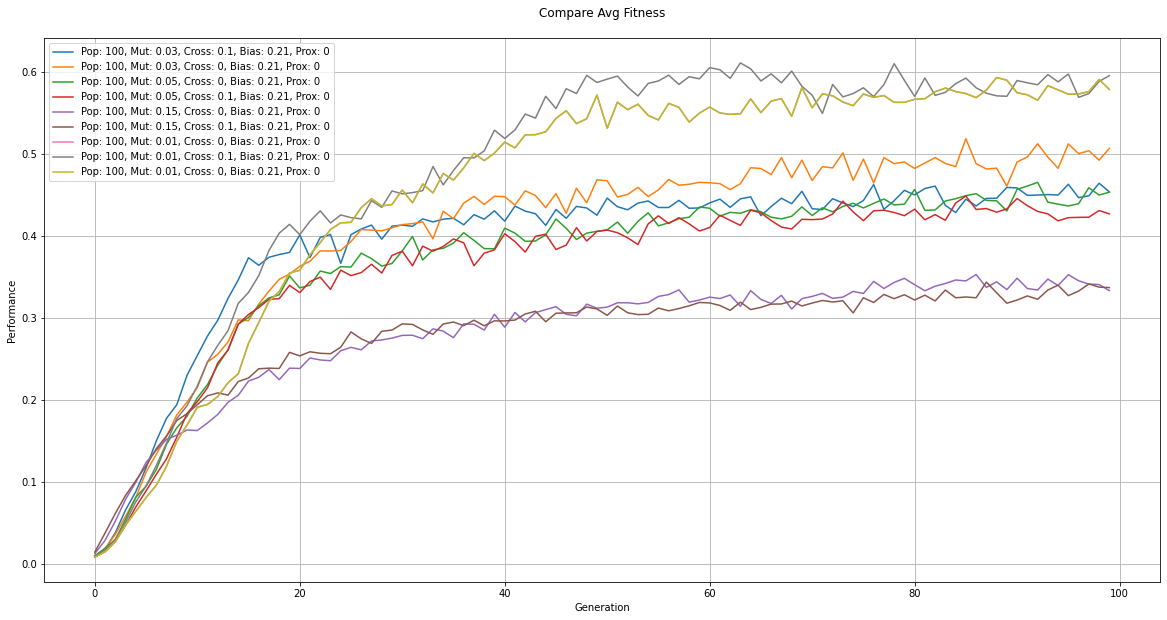

In [111]:
compare_avg_fitness(
    "performance/archivied/evolve_11-25_10-32_nodes50_k3_p100_g100_pM0.03_pC0.1_el5_bias0.21_prox0_trials1",
    "performance/archivied/evolve_11-25_09-57_nodes50_k3_p100_g100_pM0.03_pC0_el5_bias0.21_prox0_trials1",
    "performance/archivied/evolve_11-25_08-41_nodes50_k3_p100_g100_pM0.05_pC0_el5_bias0.21_prox0_trials1",
    "performance/archivied/evolve_12-18_12-31_nodes50_k3_p100_g100_pM0.05_pC0.1_el5_bias0.21_prox0_trials1",
    "performance/archivied/evolve_12-22_14-14_nodes50_k3_p100_g100_pM0.15_pC0_el5_bias0.21_prox0_trials1",
    "performance/archivied/evolve_12-22_15-03_nodes50_k3_p100_g100_pM0.15_pC0.1_el5_bias0.21_prox0_trials1",
    "performance/archivied/evolve_12-22_16-02_nodes50_k3_p100_g100_pM0.01_pC0_el5_bias0.21_prox0_trials1",
    "performance/archivied/evolve_12-22_16-54_nodes50_k3_p100_g100_pM0.01_pC0.1_el5_bias0.21_prox0_trials1",
    "performance/archivied/evolve_12-22_17-46_nodes50_k3_p100_g100_pM0.01_pC0_el5_bias0.21_prox0_trials1"
)

<AxesSubplot:title={'center':'Performance Test'}, xlabel='Configurations', ylabel='Performance'>

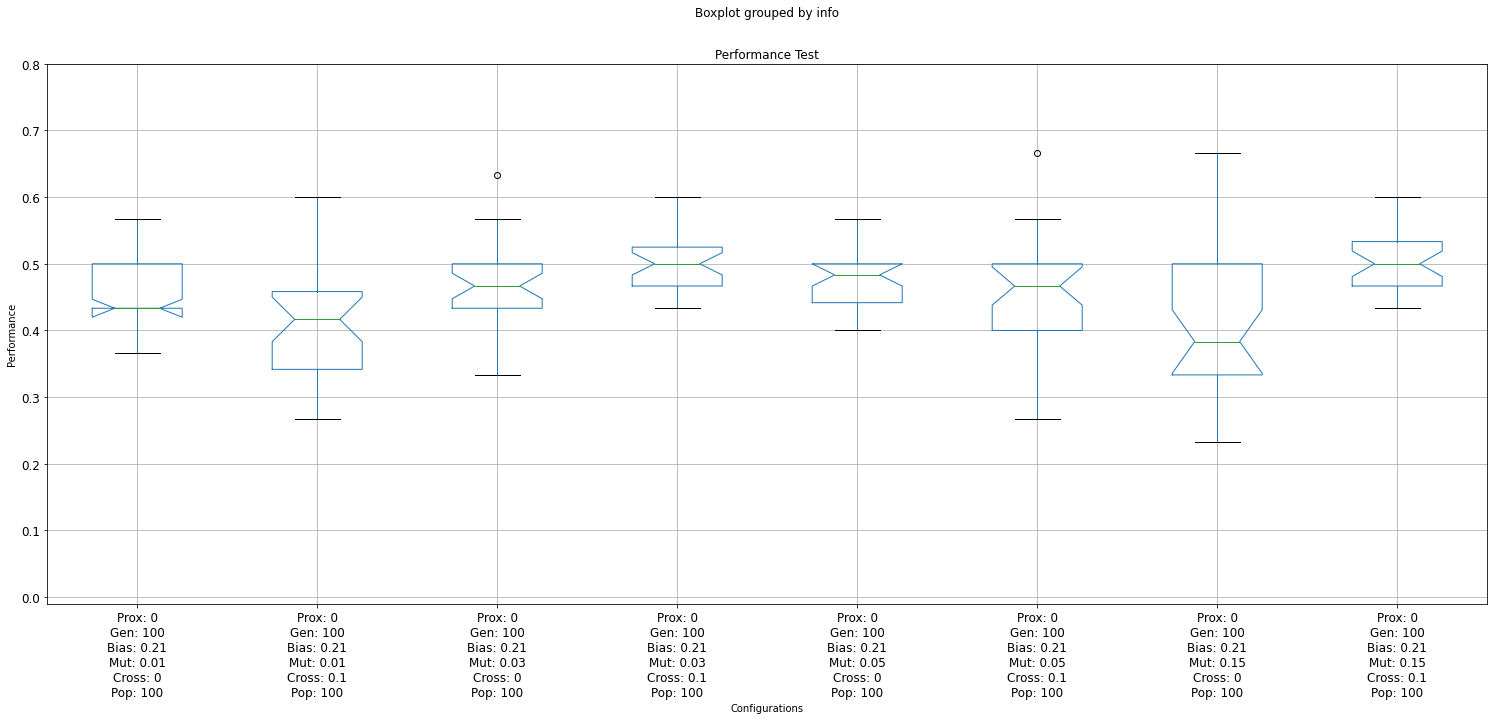

In [120]:
# tested configuration
plot_test("performance/archivied/test_11-25_10-32_nodes50_k3_p100_g100_pM0.03_pC0.1_el5_bias0.21_prox0_trials1",
          "performance/archivied/test_12-18_12-31_nodes50_k3_p100_g100_pM0.05_pC0.1_el5_bias0.21_prox0_trials",
          "performance/archivied/test_11-25_09-57_nodes50_k3_p100_g100_pM0.03_pC0_el5_bias0.21_prox0_trials1",
          "performance/archivied/test_11-25_08-41_nodes50_k3_p100_g100_pM0.05_pC0_el5_bias0.21_prox0_trials1",
          "performance/archivied/test_12-22_14-14_nodes50_k3_p100_g100_pM0.15_pC0_el5_bias0.21_prox0_trials1",
          "performance/archivied/test_12-22_15-03_nodes50_k3_p100_g100_pM0.15_pC0.1_el5_bias0.21_prox0_trials1",
          "performance/archivied/test_12-22_16-02_nodes50_k3_p100_g100_pM0.01_pC0_el5_bias0.21_prox0_trials1",
          "performance/archivied/test_12-22_16-54_nodes50_k3_p100_g100_pM0.01_pC0.1_el5_bias0.21_prox0_trials1",
          "performance/archivied/test_12-22_17-46_nodes50_k3_p100_g100_pM0.01_pC0_el5_bias0.21_prox0_trials1",
         fontsize=12)

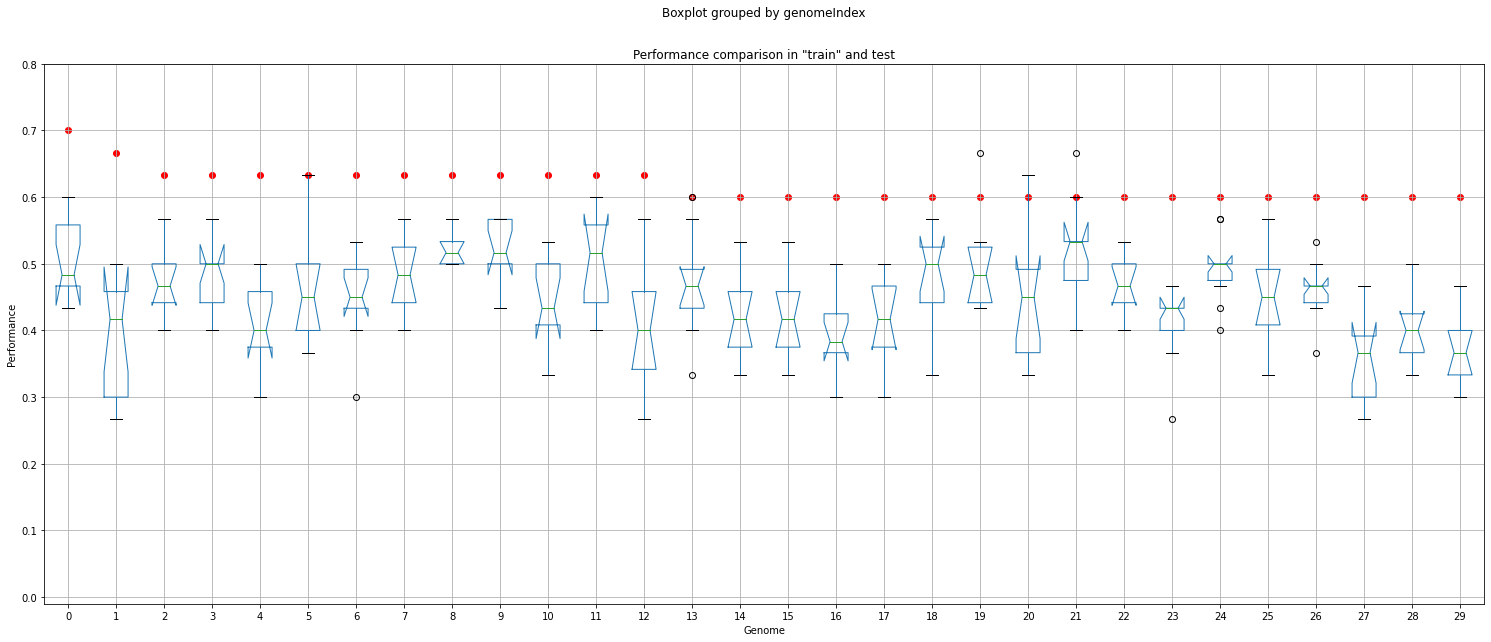

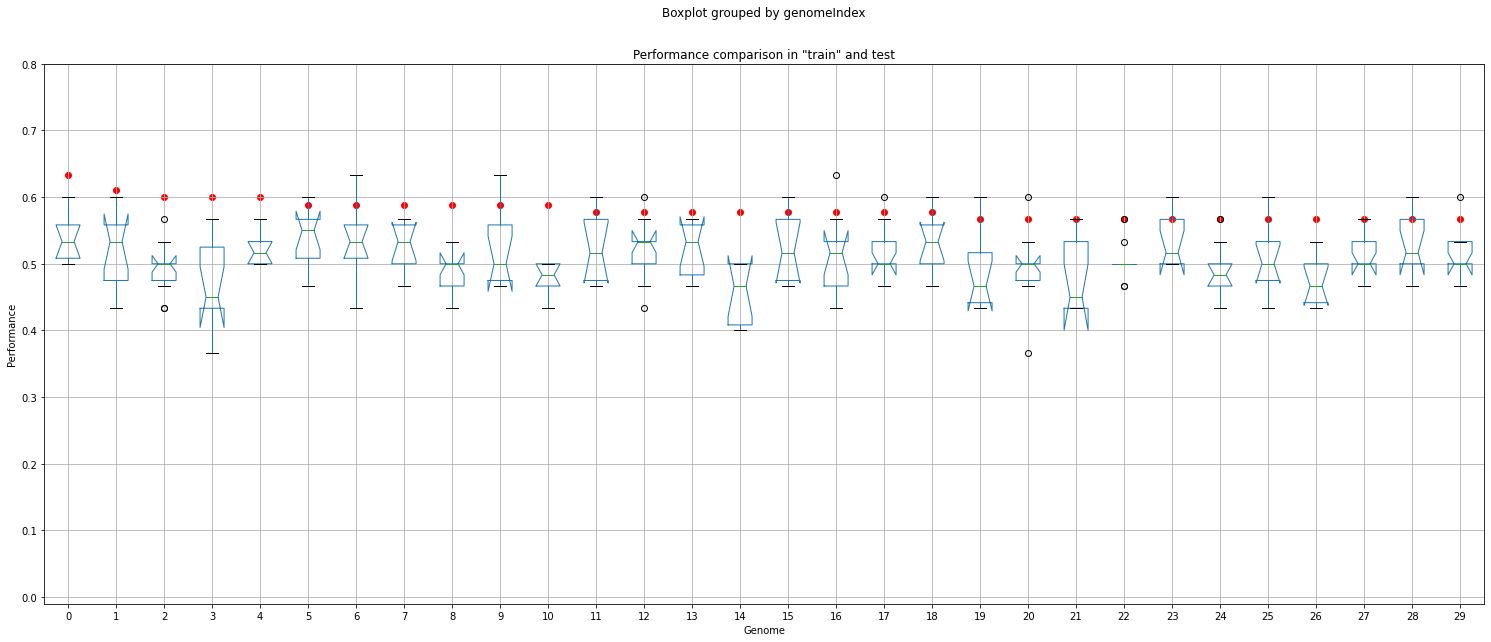

In [76]:
# comparazione del peggioramento variando il numero di trial
compare("performance/archivied/compare_11-25_10-32_nodes50_k3_p100_g100_pM0.03_pC0.1_el5_bias0.21_prox0_trials1", outliers=True)
compare("performance/archivied/compare_11-27_12-24_nodes50_k3_p100_g100_pM0.03_pC0.1_el5_bias0.21_prox0_trials3", outliers=True)

# Experiment 3


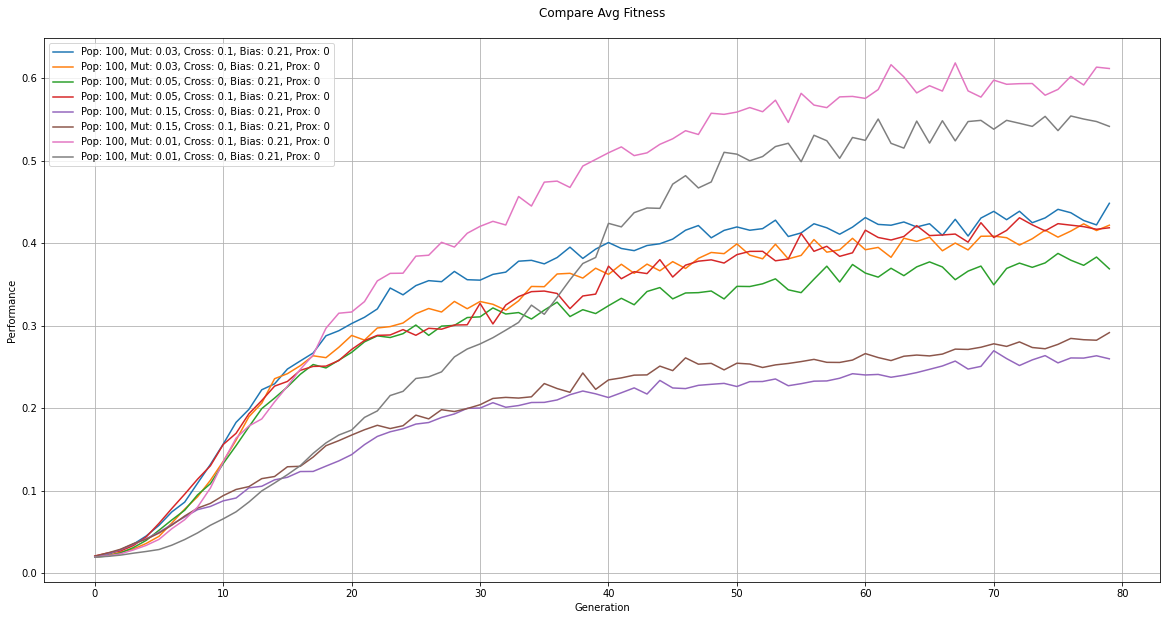

In [194]:
# cambiamento della funzione di fitness in 1 / ( 1 + e^(-A*(B-x)) ) con A = -8 e B = 0.5
compare_avg_fitness("performance/archivied/evolve_12-07_12-15_nodes50_k3_p100_g80_pM0.03_pC0.1_el5_bias0.21_prox0_trials3",
                    "performance/archivied/evolve_12-07_14-35_nodes50_k3_p100_g80_pM0.03_pC0_el5_bias0.21_prox0_trials3",
                    "performance/archivied/evolve_12-07_20-52_nodes50_k3_p100_g80_pM0.05_pC0_el5_bias0.21_prox0_trials3",
                    "performance/archivied/evolve_12-07_22-55_nodes50_k3_p100_g80_pM0.05_pC0.1_el5_bias0.21_prox0_trials3",
                    "performance/archivied/evolve_12-07_16-32_nodes50_k3_p100_g80_pM0.15_pC0_el5_bias0.21_prox0_trials3",
                    "performance/archivied/evolve_12-07_18-26_nodes50_k3_p100_g80_pM0.15_pC0.1_el5_bias0.21_prox0_trials3",
                    "performance/archivied/evolve_12-08_22-08_nodes50_k3_p100_g80_pM0.01_pC0.1_el5_bias0.21_prox0_trials3",
                    "performance/archivied/evolve_12-09_00-40_nodes50_k3_p100_g80_pM0.01_pC0_el5_bias0.21_prox0_trials3")

<AxesSubplot:title={'center':'Performance Test'}, xlabel='Configurations', ylabel='Performance'>

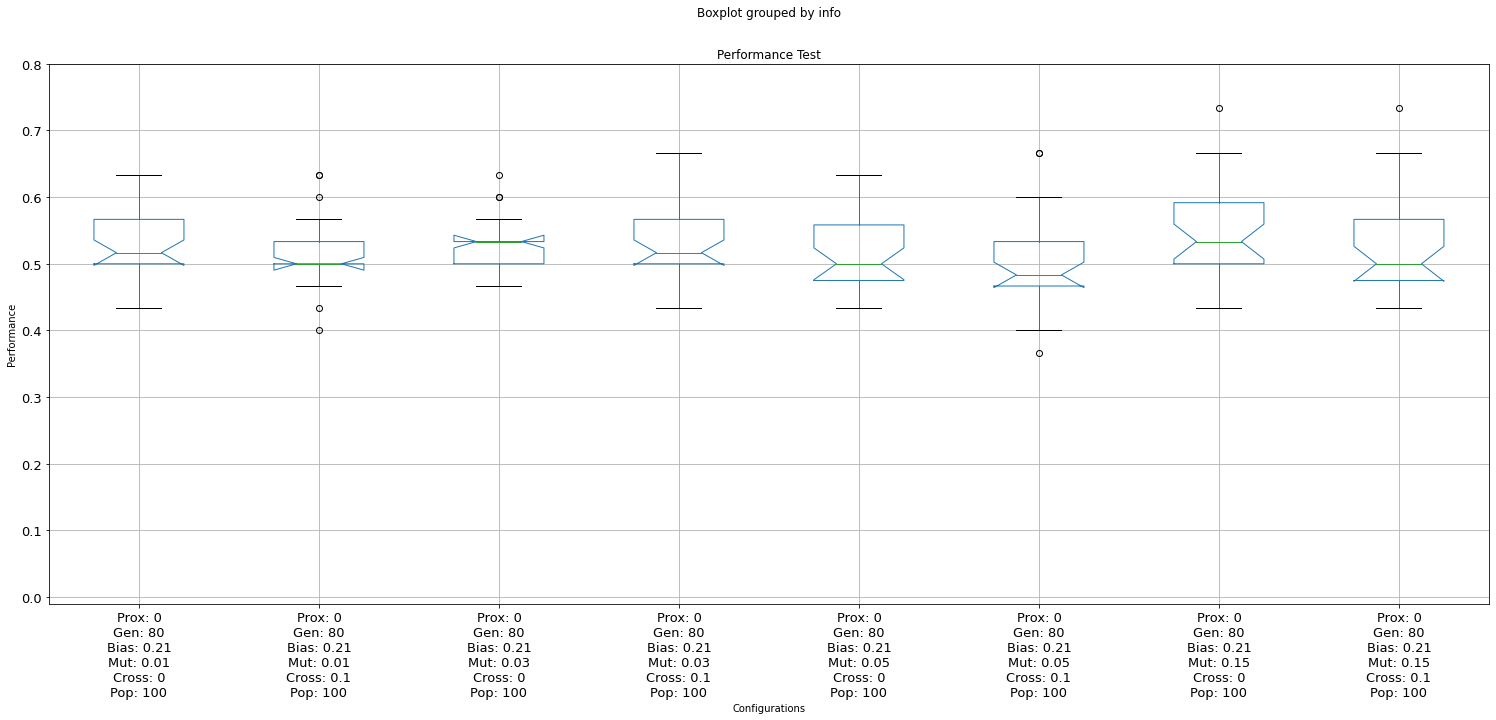

In [89]:
# performance in fase di test, uso plot_test2, fornisce una valutazione sempre sulla conta dei robot in modo che sia comparabile
plot_test2("performance/archivied/test_12-07_12-15_nodes50_k3_p100_g80_pM0.03_pC0.1_el5_bias0.21_prox0_trials3",
           "performance/archivied/test_12-07_14-35_nodes50_k3_p100_g80_pM0.03_pC0_el5_bias0.21_prox0_trials3",
           "performance/archivied/test_12-07_20-52_nodes50_k3_p100_g80_pM0.05_pC0_el5_bias0.21_prox0_trials3",
           "performance/archivied/test_12-07_22-55_nodes50_k3_p100_g80_pM0.05_pC0.1_el5_bias0.21_prox0_trials3",
           "performance/archivied/test_12-07_16-32_nodes50_k3_p100_g80_pM0.15_pC0_el5_bias0.21_prox0_trials3",
           "performance/archivied/test_12-07_18-26_nodes50_k3_p100_g80_pM0.15_pC0.1_el5_bias0.21_prox0_trials3",
           "performance/archivied/test_12-08_22-08_nodes50_k3_p100_g80_pM0.01_pC0.1_el5_bias0.21_prox0_trials3",
           "performance/archivied/test_12-09_00-40_nodes50_k3_p100_g80_pM0.01_pC0_el5_bias0.21_prox0_trials3",
          fontsize=13)

# Experiment 4

,generation,score
0,0,0.000000
1,0,0.000000
2,0,0.000000
3,0,0.000000
4,0,0.000000
...,...,...
14495,79,0.411111
14496,79,0.311111
14497,79,0.400000
14498,79,0.200000


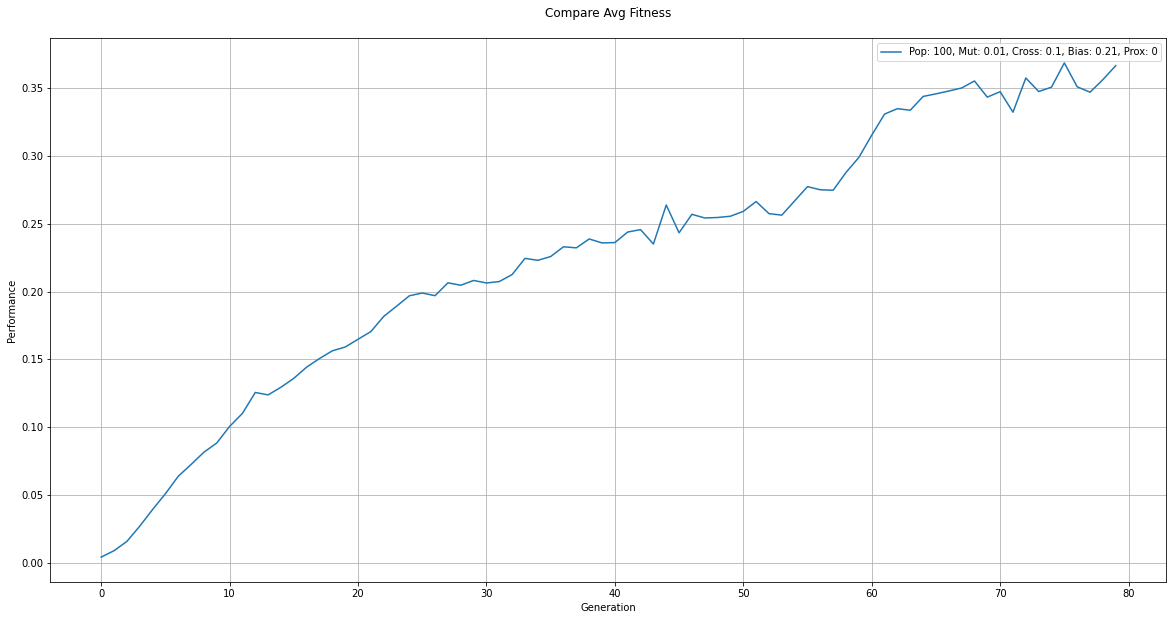

In [154]:
# performance/evolve_12-22_19-49_nodes50_k3_p100_g80_pM0.01_pC0.1_el5_bias0.21_prox0_trials3_best_all.csv
compare_avg_fitness("performance/archivied/evolve_12-22_19-49_nodes50_k3_p100_g80_pM0.01_pC0.1_el5_bias0.21_prox0_trials3")

<AxesSubplot:title={'center':'Performance Test'}, xlabel='Configurations', ylabel='Performance'>

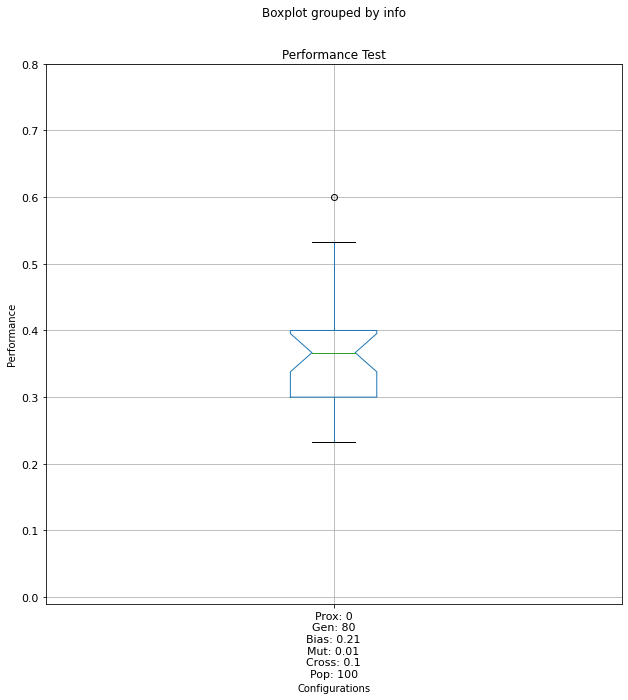

In [155]:
plot_test2("performance/archivied/test_12-22_19-49_nodes50_k3_p100_g80_pM0.01_pC0.1_el5_bias0.21_prox0_trials3", figsize=(10, 10), fontsize=11)